<a href="https://colab.research.google.com/github/vimshetsyan/labs_mini_projects/blob/main/Zangak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web scrapping and Data Collection

In [ ]:
# import all the needed libraries

import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# declearing all the needed variables and assigning empty lists to them

book_title = []
price = []
author = []
publisher = []
language = []
weight = []
age_range = []
publish_date = []
pages = []

# scrapping 6 pages of the website

for i in range(1,7):
  url = "https://zangakbookstore.am/gekharvestakan?order_by=sell&page=" + str(i)
  response = requests.get(url)
  content = BeautifulSoup(response.content, "html.parser")
  individual_frames = content.findAll("div", class_ = "col-6 col-md-4 col-lg-6 col-xl-4 col-xxl-3 mb-5 list-item")

  for j in individual_frames:

    # finding book titles and appending to the specified list
    book_title.append(j.find("h1", class_ = "mb-3").text)

    # finding book prices, coverting string type to integer and appending to the specified list
    price.append(j.find("div", class_ = "product-price").text)
    cleaned_price = [int(item.replace('դրամ', '')) for item in price]

    # finding a tag which contains the link of  individual book info and scrapingit
    a = j.find("a", class_ = "d-inline-block position-relative")
    new_url = a.get('href')
    response2 = requests.get(new_url)
    detailed_content = BeautifulSoup(response2.content, "html.parser")
    info = detailed_content.find(id = "tab_details")
    detailed_info = info.findAll("div", class_ = "form-row")

    # collecting all the available and useful data about the books, appending to the specified lists
    for k in detailed_info:
      label_tag = k.find("label")

      if (label_tag.text) == "Տարեթիվ":
          publish_date.append(int(label_tag.find_next('div').text))

      if (label_tag.text) == "Լեզու":
        language.append(label_tag.find_next('div').text)

      if (label_tag.text) == "Քաշ":
        weight.append(label_tag.find_next('div').text)
        cleaned_weight = [int(item.replace('գրամ', '')) for item in weight]

      if (label_tag.text) == "Տարիք":
        age_range.append(label_tag.find_next('div').text)
        cleaned_age = [int(item.replace('+', '')) for item in age_range]

      if (label_tag.text) == "Էջեր":
        pages.append(int(label_tag.find_next('div').text))

     # finding book authors and appending to the specified list
    if j.find("h2"):
      author.append(j.find("h2").text)
    else:
      author.append("No aouthor available")




In [ ]:
# declearing dictionary, assigning future datafram column name as a key and column data as a value

data = {
    "Title": book_title,
    "Pages": pages,
    "Price in AMD" : cleaned_price,
    "Author": author,
    "Age Range" : cleaned_age,
    "Weight in Grams": cleaned_weight,
    "Publish date" : publish_date,
    "Language" : language
}

In [ ]:
# transforming dictionary into dataframe
df = pd.DataFrame(data)
df

,Title,Pages,Price in AMD,Author,Age Range,Weight in Grams,Publish date,Language
0,Ինֆեռնո,512,4900,Դեն Բրաուն,16,678,2017,Հայերեն
1,Նորվեգական անտառ,456,5990,Հարուկի Մուրակամի,16,494,2020,Հայերեն
2,Нежнее нежного лицо твое...,384,1800,Օսիպ Մանդելշտամ,16,230,2021,Ռուսերեն
3,Մի բուռ արև,96,3000,Սիրանուշ Զախարյան,11,250,2022,Հայերեն
4,Մատրյոնայի կալվածքը,320,2000,Ալեքսանդր Սոլժենիցին,16,480,2016,Հայերեն
...,...,...,...,...,...,...,...,...
115,Great Expectations,640,7200,Չարլզ Դիքենս,16,379,2023,Անգլերեն
116,Ghost Stories,384,6400,Չարլզ Դիքենս,16,264,2023,Անգլերեն
117,David Copperfield,1264,8300,Չարլզ Դիքենս,16,632,2023,Անգլերեն
118,Robinson Crusoe,392,6400,Դանիել Դեֆո,12,272,2023,Անգլերեն


In [ ]:
# getting basic information about datafame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            120 non-null    object
 1   Pages            120 non-null    int64 
 2   Price in AMD     120 non-null    int64 
 3   Author           120 non-null    object
 4   Age Range        120 non-null    int64 
 5   Weight in Grams  120 non-null    int64 
 6   Publish date     120 non-null    int64 
 7   Language         120 non-null    object
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


In [ ]:
# generating random sales data to make the analizies mor interesting
sales = []
for _ in range(120):
    sales.append(random.randint(0, 200))

df["Total Sales"] = sales
df

,Title,Pages,Price in AMD,Author,Age Range,Weight in Grams,Publish date,Language,Total Sales
0,Ինֆեռնո,512,4900,Դեն Բրաուն,16,678,2017,Հայերեն,59
1,Նորվեգական անտառ,456,5990,Հարուկի Մուրակամի,16,494,2020,Հայերեն,39
2,Нежнее нежного лицо твое...,384,1800,Օսիպ Մանդելշտամ,16,230,2021,Ռուսերեն,48
3,Մի բուռ արև,96,3000,Սիրանուշ Զախարյան,11,250,2022,Հայերեն,200
4,Մատրյոնայի կալվածքը,320,2000,Ալեքսանդր Սոլժենիցին,16,480,2016,Հայերեն,168
...,...,...,...,...,...,...,...,...,...
115,Great Expectations,640,7200,Չարլզ Դիքենս,16,379,2023,Անգլերեն,97
116,Ghost Stories,384,6400,Չարլզ Դիքենս,16,264,2023,Անգլերեն,196
117,David Copperfield,1264,8300,Չարլզ Դիքենս,16,632,2023,Անգլերեն,158
118,Robinson Crusoe,392,6400,Դանիել Դեֆո,12,272,2023,Անգլերեն,73


#Data cleaning

In [ ]:
df = pd.DataFrame(data)
df

,Title,Pages,Price in AMD,Author,Age Range,Weight in Grams,Publish date,Language
0,Ինֆեռնո,512,4900,Դեն Բրաուն,16,678,2017,Հայերեն
1,Նորվեգական անտառ,456,5990,Հարուկի Մուրակամի,16,494,2020,Հայերեն
2,Нежнее нежного лицо твое...,384,1800,Օսիպ Մանդելշտամ,16,230,2021,Ռուսերեն
3,Մի բուռ արև,96,3000,Սիրանուշ Զախարյան,11,250,2022,Հայերեն
4,Մատրյոնայի կալվածքը,320,2000,Ալեքսանդր Սոլժենիցին,16,480,2016,Հայերեն
...,...,...,...,...,...,...,...,...
115,Great Expectations,640,7200,Չարլզ Դիքենս,16,379,2023,Անգլերեն
116,Ghost Stories,384,6400,Չարլզ Դիքենս,16,264,2023,Անգլերեն
117,David Copperfield,1264,8300,Չարլզ Դիքենս,16,632,2023,Անգլերեն
118,Robinson Crusoe,392,6400,Դանիել Դեֆո,12,272,2023,Անգլերեն


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            120 non-null    object
 1   Pages            120 non-null    int64 
 2   Price in AMD     120 non-null    int64 
 3   Author           119 non-null    object
 4   Age Range        120 non-null    int64 
 5   Weight in Grams  120 non-null    int64 
 6   Publish date     120 non-null    int64 
 7   Language         120 non-null    object
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


In [ ]:
#  apply transformation techniques to show prices in US market

df["Price in USD"] = df["Price in AMD"] / 405

#Data Prepossesing

In [ ]:
# normalizing the data will help us facilitate fair comparisions without currency scale discrepancies

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Price in AMD", "Price in USD"]])

df_normalized = pd.DataFrame(scaled_data, columns=["Price in AMD (normalized)", "Price in USD (normalized)"])
df_normalized.head()


,Price in AMD (normalized),Price in USD (normalized)
0,0.171504,0.171504
1,0.229024,0.229024
2,0.007916,0.007916
3,0.071240,0.071240
4,0.018470,0.018470


In [ ]:
#  convert categorical data into numerical  formats using methods like one hot encoding

# One hot encoding
encoded_data = pd.get_dummies(df[["Language"]])
df_encoded = pd.concat([df, encoded_data], axis=1)
df_encoded.head()

,Title,Pages,Price in AMD,Author,Age Range,Weight in Grams,Publish date,Language,Total Sales,Price in USD,Language_Անգլերեն,Language_Արևմտահայերեն,Language_Գերմաներեն,Language_Հայերեն,Language_Ռուսերեն
0,Ինֆեռնո,512,4900,Դեն Բրաուն,16,678,2017,Հայերեն,59,12.098765,0,0,0,1,0
1,Նորվեգական անտառ,456,5990,Հարուկի Մուրակամի,16,494,2020,Հայերեն,39,14.790123,0,0,0,1,0
2,Нежнее нежного лицо твое...,384,1800,Օսիպ Մանդելշտամ,16,230,2021,Ռուսերեն,48,4.444444,0,0,0,0,1
3,Մի բուռ արև,96,3000,Սիրանուշ Զախարյան,11,250,2022,Հայերեն,200,7.407407,0,0,0,1,0
4,Մատրյոնայի կալվածքը,320,2000,Ալեքսանդր Սոլժենիցին,16,480,2016,Հայերեն,168,4.938272,0,0,0,1,0


In [ ]:
#  a convert categorical data into numerical  formats using methods like label encoding and  value count
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Language_encoded'] = label_encoder.fit_transform(df['Language'])
df['Language_encoded'].value_counts()


0    46
3    30
2    27
4    10
1     7
Name: Language_encoded, dtype: int64

#Data Analysis

## Descriptive Statistics

In [ ]:
df.describe()

,Pages,Price in AMD,Age Range,Weight in Grams,Publish date,Total Sales
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,375.183333,6446.500000,15.550000,554.941667,2022.658333,96.641667
std,226.109031,3408.522105,1.425164,411.521062,1.246817,59.001609
min,53.000000,1650.000000,10.000000,74.000000,2014.000000,0.000000
25%,220.000000,3900.000000,16.000000,259.000000,2023.000000,42.750000
50%,348.000000,5945.000000,16.000000,447.000000,2023.000000,95.500000
75%,458.000000,7900.000000,16.000000,728.500000,2023.000000,147.750000
max,1264.000000,20600.000000,18.000000,2396.000000,2023.000000,200.000000


##Distribution Analysis

(array([25., 19., 44., 11.,  8.,  6.,  4.,  2.,  0.,  1.]),
 array([ 1650.,  3545.,  5440.,  7335.,  9230., 11125., 13020., 14915.,
        16810., 18705., 20600.]),
 <BarContainer object of 10 artists>)

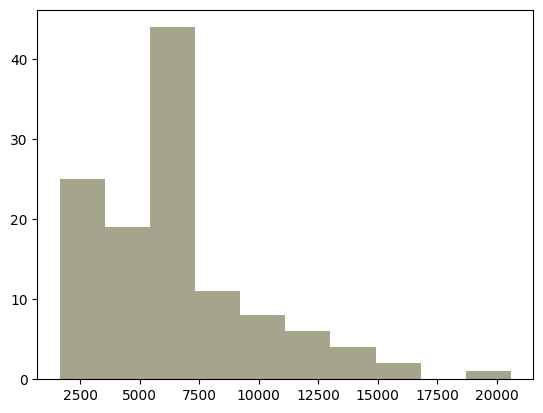

In [ ]:
 #Plotting a histogram to visualize the distribution of 'Price in AMD'

plt.hist(df['Price in AMD'],color = "#a5a58d")

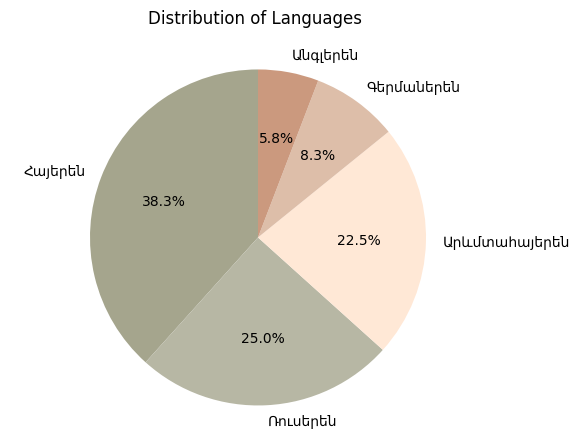

In [ ]:
count_values = df['Language'].value_counts()
lang_list = []
for item in df['Language']:
  if item not in lang_list:
    lang_list.append(item)

# Plotting the pie chart
plt.pie(count_values , labels=lang_list, autopct='%1.1f%%', startangle=90, colors=['#a5a58d', '#b7b7a4', '#ffe8d6','#ddbea9', '#cb997e' ])
plt.axis('equal')

# Display the pie chart
plt.title('Distribution of Languages \n')
plt.show()

In [ ]:
df.describe()

,Pages,Price in AMD,Age Range,Weight in Grams,Publish date,Total Sales
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,375.183333,6446.500000,15.550000,554.941667,2022.658333,96.641667
std,226.109031,3408.522105,1.425164,411.521062,1.246817,59.001609
min,53.000000,1650.000000,10.000000,74.000000,2014.000000,0.000000
25%,220.000000,3900.000000,16.000000,259.000000,2023.000000,42.750000
50%,348.000000,5945.000000,16.000000,447.000000,2023.000000,95.500000
75%,458.000000,7900.000000,16.000000,728.500000,2023.000000,147.750000
max,1264.000000,20600.000000,18.000000,2396.000000,2023.000000,200.000000


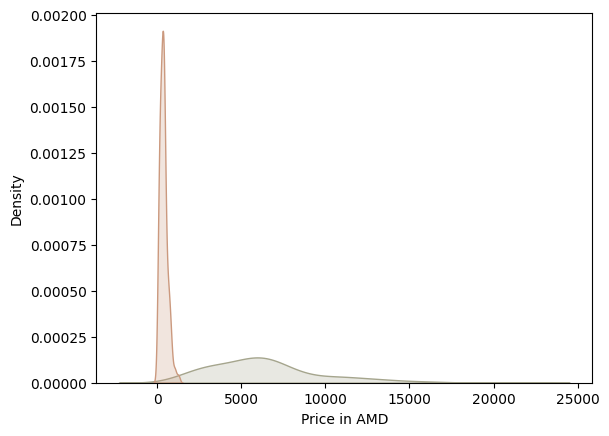

In [ ]:
sns.kdeplot(df["Price in AMD"], fill = True, color = "#a5a58d")
sns.kdeplot(df["Pages"], fill = True, color = "#cb997e")
plt.show()

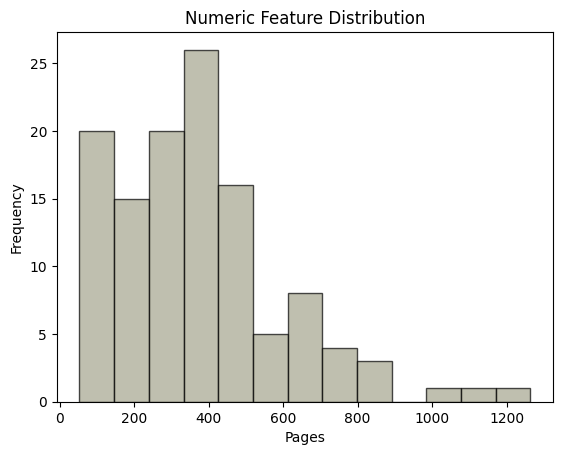

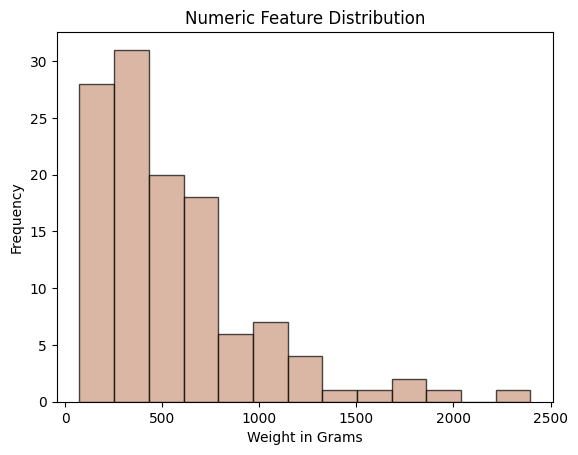

In [ ]:
# a histogram for pages and wight in grams

# Plotting a histogram to visualize the distribution of 'Pages'
plt.hist(df['Pages'], bins='auto', alpha=0.7, color='#a5a58d', edgecolor='black')
plt.title('Numeric Feature Distribution')
plt.xlabel('Pages')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram to visualize the distribution of 'Weight in Grams'
plt.hist(df['Weight in Grams'], bins='auto', alpha=0.7, color='#cb997e', edgecolor='black')
plt.title('Numeric Feature Distribution')
plt.xlabel('Weight in Grams')
plt.ylabel('Frequency')
plt.show()


##Correlation Analysis

In [ ]:
corr = df['Pages'].corr(df['Weight in Grams'])
print('Correlation between Weight in Grams and Pages:', corr)

Correlation between Weight in Grams and Pages: 0.33293951638228647


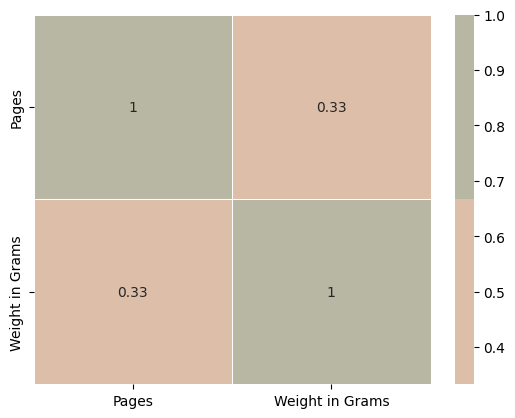

In [ ]:

sns.heatmap(df[['Pages','Weight in Grams']].corr(), annot=True, cmap=sns.color_palette(['#ddbea9', '#b7b7a4']), linewidths=.5)
plt.show()

##Hypothesis testing

In [ ]:
# a hyphpthesis testing for Prices in AMD  and Prices in USD

from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df['Price in AMD'], df['Price in USD'])

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Prices in AMD and Prices in USD.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Prices in AMD  and Prices in USD.")


Reject the null hypothesis: There is a significant correlation between Prices in AMD and Prices in USD.


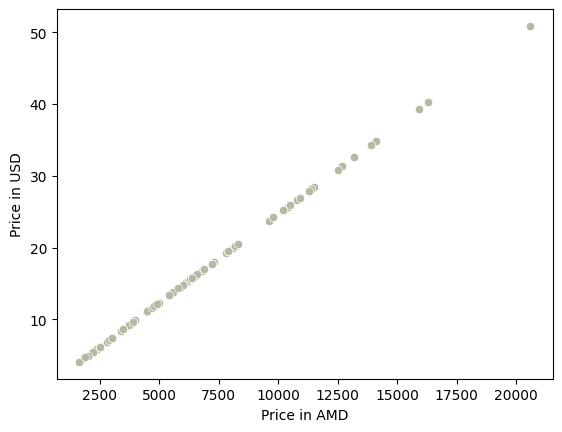

In [ ]:
# scatter plot

import seaborn as sns

sns.scatterplot(x="Price in AMD", y="Price in USD", data=df, color=['#b7b7a4'] )
plt.show()


#Data Visualisation

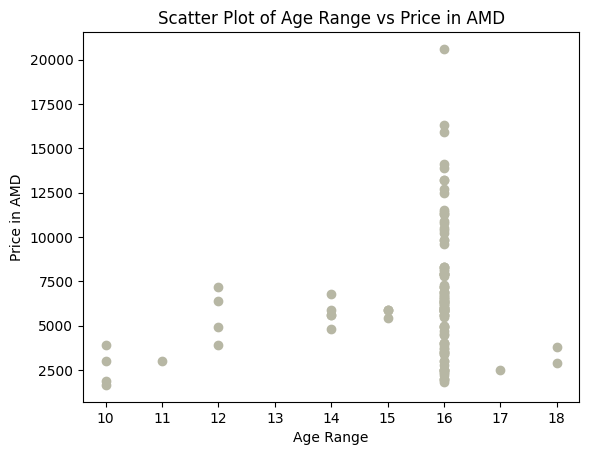

In [ ]:
# scatter plot

plt.scatter(df['Age Range'], df['Price in AMD'], color=['#b7b7a4'])
plt.xlabel('Age Range')
plt.ylabel('Price in AMD')
plt.title('Scatter Plot of Age Range vs Price in AMD')
plt.show()


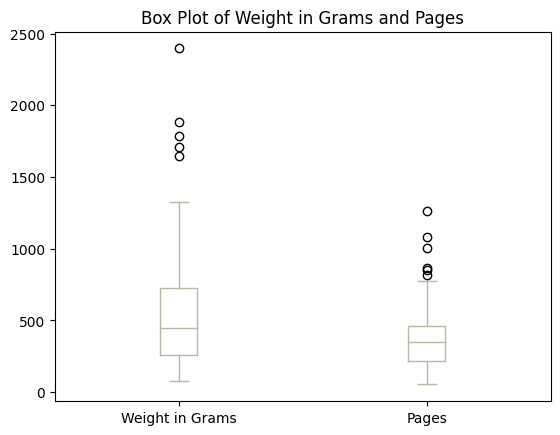

In [ ]:
# a box plot for weight in grams and pages

df[['Weight in Grams', 'Pages' ]].plot(kind='box', color='#b7b7a4')
plt.title('Box Plot of Weight in Grams and Pages')
plt.show()
